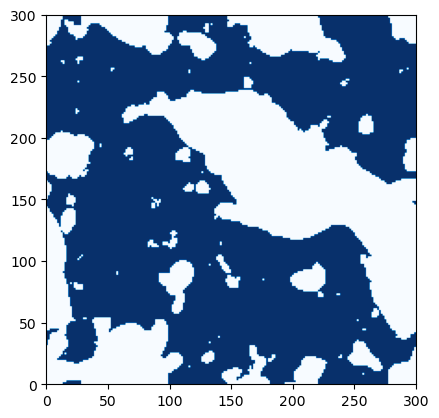

In [30]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

def load_xHI_cube(xHI_cube_file):
    # Get box dimensions (pixels) and size (cMpc)
    DIM  = int(xHI_cube_file.split('Mpc')[0].split('_')[-2])
    size = int(xHI_cube_file.split('Mpc')[0].split('_')[-1])
    #print(DIM, size)

    # Reshape cube (is 1D array --> make it 3D)
    xHI_cube = load_binary_data(xHI_cube_file)

    xHI_cube.shape = (DIM, DIM, DIM)
    xHI_cube = xHI_cube.reshape((DIM, DIM, DIM), order='F')
    return xHI_cube, DIM, size

def load_binary_data(file):
    # Read binary data from file
    return np.fromfile(file, dtype=np.float32)

# read xHI cube
xHIboxfilname='xH_nohalos_z008.00_nf0.623784_eff1359.2_effPLindex0_HIIfilter1_Mmin1.0e+11_RHIImax50_200_300Mpc'
xHIcube, DIM, size =load_xHI_cube("D:/Thesis/d5nAGF0VAa/test_box_xHI_galcat/" + xHIboxfilname)

# read galaxy catalog
masfilname='taudamp_z008.00_nf0.62378_1000_300Mpc_master_bubnoadded.csv'
galcat = pd.read_csv("D:/Thesis/d5nAGF0VAa/test_box_xHI_galcat/" +masfilname)

# plot a slice of the xHIcube
i_zslice=1 # plot the 100th slice for example
extent=[0,size,0,size]
aspect =(extent[1]-extent[0])/(extent[3]-extent[2])
plt.imshow(np.rot90(xHIcube[:,:,i_zslice]),extent=extent,aspect=aspect, cmap = "Blues")


In [53]:
z = data.iloc[:, 2]
z.sort_values().unique()
print(z.sort_values)

<bound method Series.sort_values of 0         0.7492
1         0.2783
2         0.7168
3         0.6176
4         0.0444
           ...  
107293    0.0306
107294    0.1361
107295    0.6893
107296    0.3015
107297    0.6872
Name: z, Length: 107298, dtype: float64>


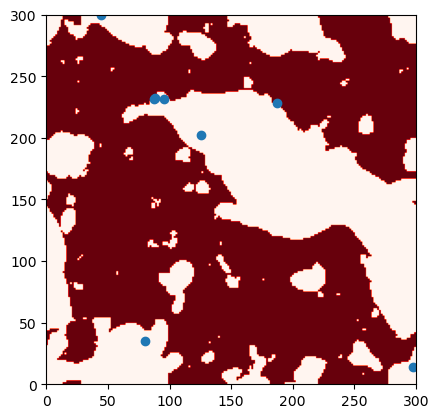

In [54]:
z = data.iloc[:, 2]
z.sort_values().unique()
filtered_df = df[df['z'] == 1e-4]
filtered_df
filtered_x = filtered_df.iloc[:, 1]
filtered_y = filtered_df.iloc[:, 2]

plt.scatter(300*filtered_x, 300*filtered_y)

plt.imshow(np.rot90(xHIcube[:,:,i_zslice]),extent=extent,aspect=aspect, cmap = "Reds")
plt.show()

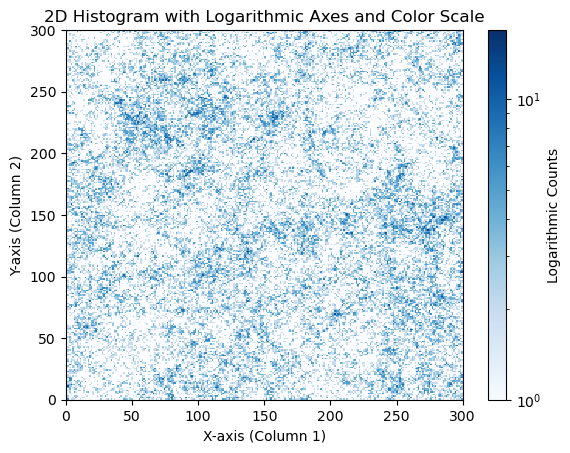

In [34]:
import matplotlib as mpl
from matplotlib import colors
# Replace with your actual file path
df = pd.read_csv(masfilname)

data = df.iloc[:, 1:4]  

# Extract the two columns (let's call them 'x' and 'y')
x = data.iloc[:, 0]  # First column (X-axis)
y = data.iloc[:, 1]  # Second column (Y-axis)
#z = data.iloc[:, 2]



# Create 2D histogram with a logarithmic color scale
plt.hist2d(300*x, 300*y, bins=256, cmap='Blues', norm=colors.LogNorm()) 

# Add a color bar and labels
plt.colorbar(label='Logarithmic Counts')

# Set X and Y axes to logarithmic scale


# Add labels and title
plt.xlabel('X-axis (Column 1)')
plt.ylabel('Y-axis (Column 2)')
plt.title('2D Histogram with Logarithmic Axes and Color Scale')
plt.xlim([0,300])
plt.ylim([0,300])

# Show the plot
plt.show()

(array([[4., 1., 3., ..., 0., 2., 3.],
        [7., 2., 3., ..., 0., 0., 2.],
        [1., 1., 1., ..., 3., 1., 1.],
        ...,
        [2., 2., 3., ..., 3., 2., 5.],
        [2., 7., 2., ..., 2., 2., 4.],
        [5., 1., 3., ..., 2., 1., 2.]]),
 array([  0.        ,   1.17175781,   2.34351563,   3.51527344,
          4.68703125,   5.85878906,   7.03054688,   8.20230469,
          9.3740625 ,  10.54582031,  11.71757813,  12.88933594,
         14.06109375,  15.23285156,  16.40460937,  17.57636719,
         18.748125  ,  19.91988281,  21.09164063,  22.26339844,
         23.43515625,  24.60691406,  25.77867188,  26.95042969,
         28.1221875 ,  29.29394531,  30.46570313,  31.63746094,
         32.80921875,  33.98097656,  35.15273438,  36.32449219,
         37.49625   ,  38.66800781,  39.83976563,  41.01152344,
         42.18328125,  43.35503906,  44.52679688,  45.69855469,
         46.8703125 ,  48.04207031,  49.21382813,  50.38558594,
         51.55734375,  52.72910156,  53.9008593

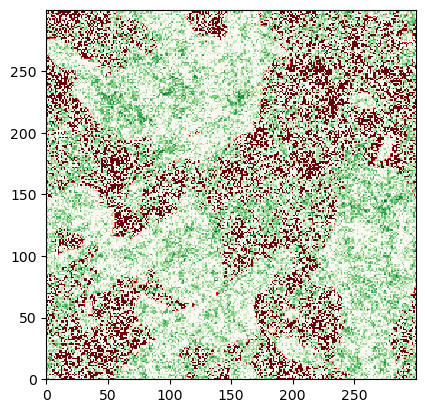

In [29]:
plt.imshow(np.rot90(xHIcube[:,:,i_zslice]),extent=extent,aspect=aspect, cmap = "Reds")
plt.hist2d(300*x, 300*y, bins=256, cmap='Greens', norm=colors.LogNorm()) 

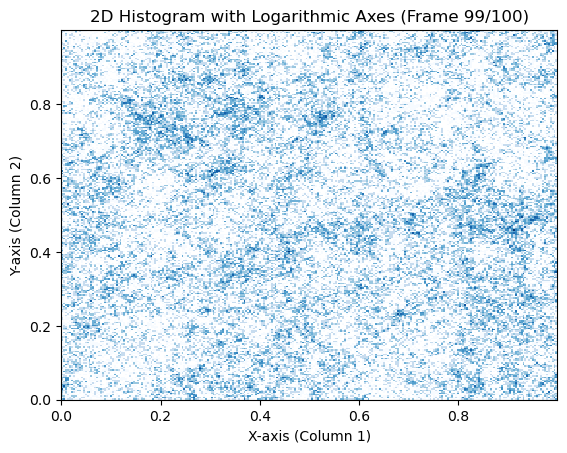

In [9]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import colors
import pandas as pd
from matplotlib.animation import FuncAnimation, PillowWriter

# Load the data from a CSV file (replace 'masfilname' with the actual file name)
df = pd.read_csv(masfilname)

# Extract the necessary columns for the 2D histogram
data = df.iloc[:, 1:3]  # Extracting the columns for the histogram (adjust columns if needed)
x = data.iloc[:, 0]  # First column (X-axis)
y = data.iloc[:, 1]  # Second column (Y-axis)

# Number of frames for the animation
num_frames = 50

# Function to update the 2D histogram for each frame
def update_hist(num, x, y, ax):
    ax.clear()  # Clear the current plot
    ax.hist2d(x[:int(len(x) * num / num_frames)], y[:int(len(y) * num / num_frames)], 
              bins=256, cmap='Blues', norm=colors.LogNorm())  # Update with more data

    # Set titles and labels
    ax.set_title(f'2D Histogram with Logarithmic Axes (Frame {num}/{num_frames})')
    ax.set_xlabel('X-axis (Column 1)')
    ax.set_ylabel('Y-axis (Column 2)')
    ax.set_xlim([x.min(), x.max()])
    ax.set_ylim([y.min(), y.max()])

# Create the figure and axis for plotting
fig, ax = plt.subplots()

# Create the animation
ani = animation.FuncAnimation(fig, update_hist, frames=num_frames, fargs=(x, y, ax), repeat=False)

ani.save('halo.gif', writer=PillowWriter(fps=10))
# Show the animation
plt.show()


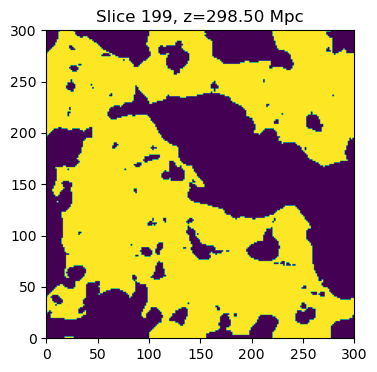

In [41]:
from matplotlib.animation import FuncAnimation, PillowWriter

# Create a figure for the animation
fig, ax = plt.subplots(figsize=(4, 4))

# Define the extent and aspect for plotting
extent = [0, size, 0, size]
aspect = (extent[1] - extent[0]) / (extent[3] - extent[2])

im = ax.imshow(np.rot90(xHIcube[:, :, 0]), extent=extent, aspect=aspect, cmap='viridis')
scatter = ax.scatter([], [], color='red', marker='o', s=10, label='Halos')

# Function to update each frame (each slice)
def update(i_zslice):
    # Update the xHI cube slice
    im.set_array(np.rot90(xHIcube[:, :, i_zslice]))

    # Calculate the z position of the slice
    z_position = i_zslice * (size / DIM)

    # Filter halos within the current slice (using tolerance)
    tolerance = size / DIM
    halos_in_slice = galcat[(galcat['z'] >= z_position - tolerance/2) & (galcat['z'] < z_position + tolerance/2)]

    # Update the halo positions for the current slice
    scatter.set_offsets(np.c_[halos_in_slice['x'], halos_in_slice['y']])

    # Set the title with the slice number and z-position
    ax.set_title(f'Slice {i_zslice}, z={z_position:.2f} Mpc')

    return im, scatter  # Return the updated objects

# Create the animation
ani = FuncAnimation(fig, update, frames=DIM, interval=200, blit=True, repeat=False)

# Save the animation as a video file (e.g., mp4) or GIF
# For mp4 (requires ffmpeg), uncomment the following:
# ani.save('xHI_cube_animation.mp4', writer='ffmpeg', dpi=300)

# For GIF (requires pillow), uncomment the following:
ani.save('xHI_cube_animation.gif', writer=PillowWriter(fps=10))

plt.show()